In [4]:
import requests
import json
import pandas as pd

from collections import Counter
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 

In [10]:
url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/tps00098?format=JSON&time=2011&time=2012&time=2013&time=2014&time=2015&time=2016&time=2017&time=2018&time=2019&time=2020&time=2021&time=2022&geo=BE&geo=BG&geo=CZ&geo=DK&geo=DE&geo=EE&geo=IE&geo=EL&geo=ES&geo=FR&geo=HR&geo=IT&geo=CY&geo=LV&geo=LT&geo=LU&geo=HU&geo=MT&geo=NL&geo=AT&geo=PL&geo=PT&geo=RO&geo=SI&geo=SK&geo=FI&geo=SE&geo=IS&geo=NO&geo=CH&geo=BA&geo=RS&geo=TR&unit=PC_GDP&spdeps=TOTAL&lang=en"
response = requests.get(url)
data = response.json()
dimensions = data['dimension']
values = data['value']


rows = []


dim_names = list(dimensions.keys())


for index, value in values.items():
    row = {}
        

    idx = int(index)
        

    temp_idx = idx
    for dim_name in reversed(dim_names):
        dim_size = len(dimensions[dim_name]['category']['index'])
        dim_idx = temp_idx % dim_size
        temp_idx = temp_idx // dim_size
            
    
        dim_keys = list(dimensions[dim_name]['category']['index'].keys())
        category_key = dim_keys[dim_idx]
            
        
        if 'label' in dimensions[dim_name]['category']:
            row[dim_name] = dimensions[dim_name]['category']['label'].get(category_key, category_key)
        else:
            row[dim_name] = category_key
        
    
        row['value'] = value
        rows.append(row)


    df = pd.DataFrame(rows)
    df_clean = df.drop(["spdeps","freq","unit"], axis =1 )
    df_clean = df_clean[df_clean['geo'] != 'Türkiye']  

In [11]:
display(df_clean)

,time,value,geo
0,2011,28.96,Austria
1,2011,28.96,Austria
2,2011,28.96,Austria
3,2011,28.96,Austria
4,2011,28.96,Austria
...,...,...,...
1905,2022,18.18,Slovakia
1906,2022,18.18,Slovakia
1907,2022,18.18,Slovakia
1908,2022,18.18,Slovakia


In [12]:
df_clean.describe()

,value
count,1910.000000
mean,23.466571
std,5.794746
min,11.370000
25%,18.610000
50%,22.870000
75%,28.760000
max,38.000000


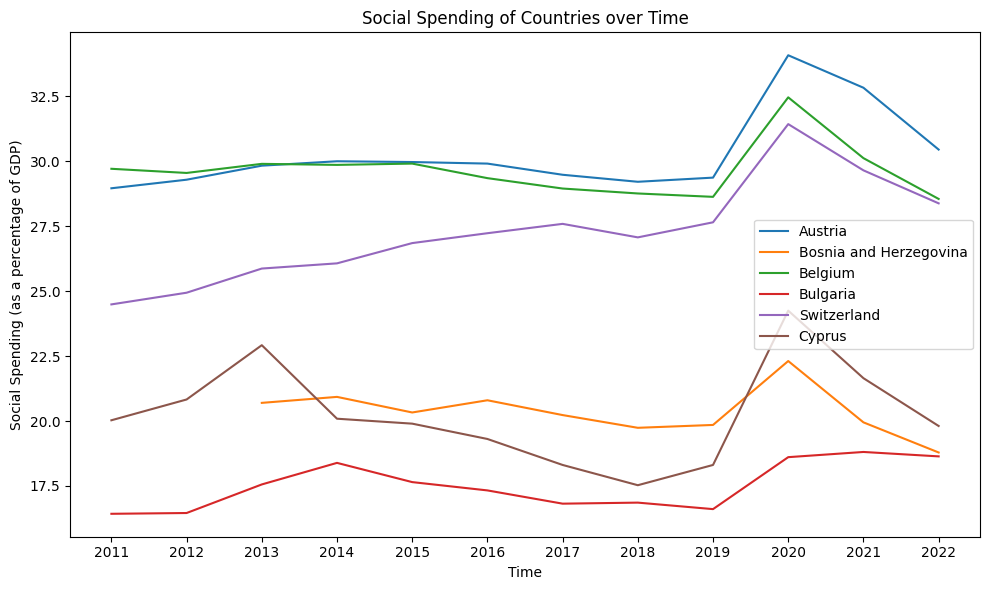

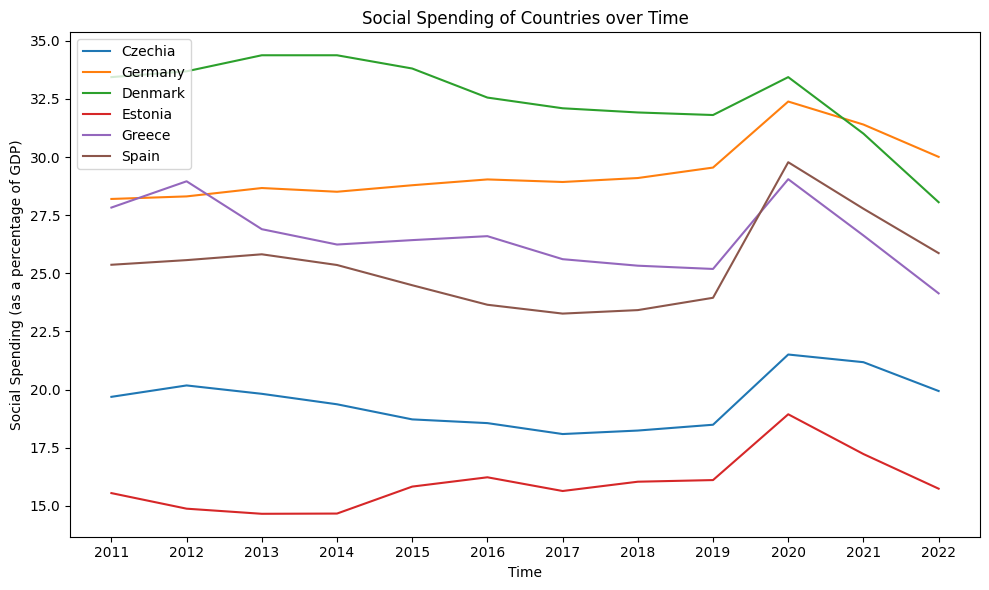

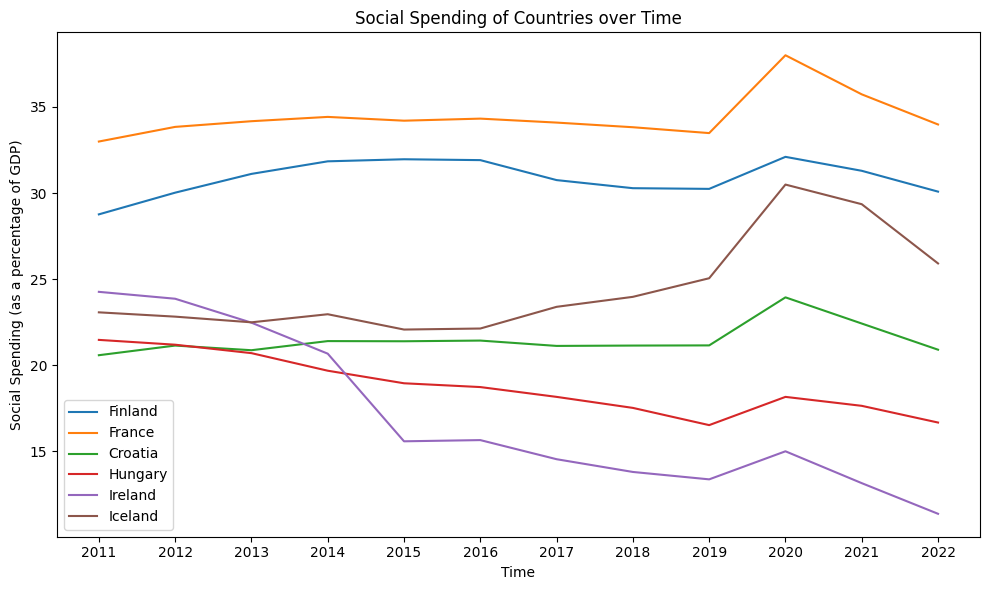

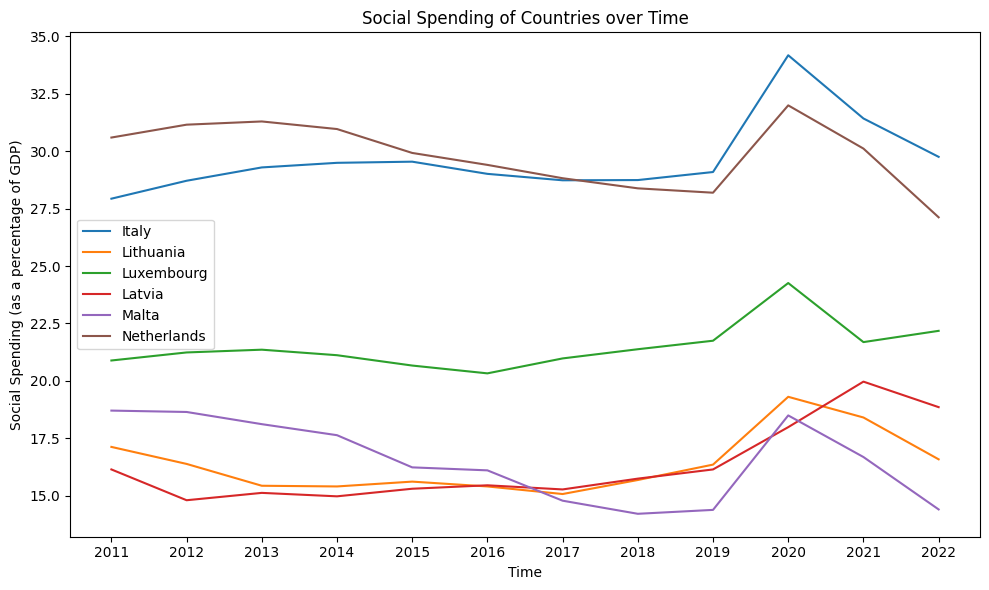

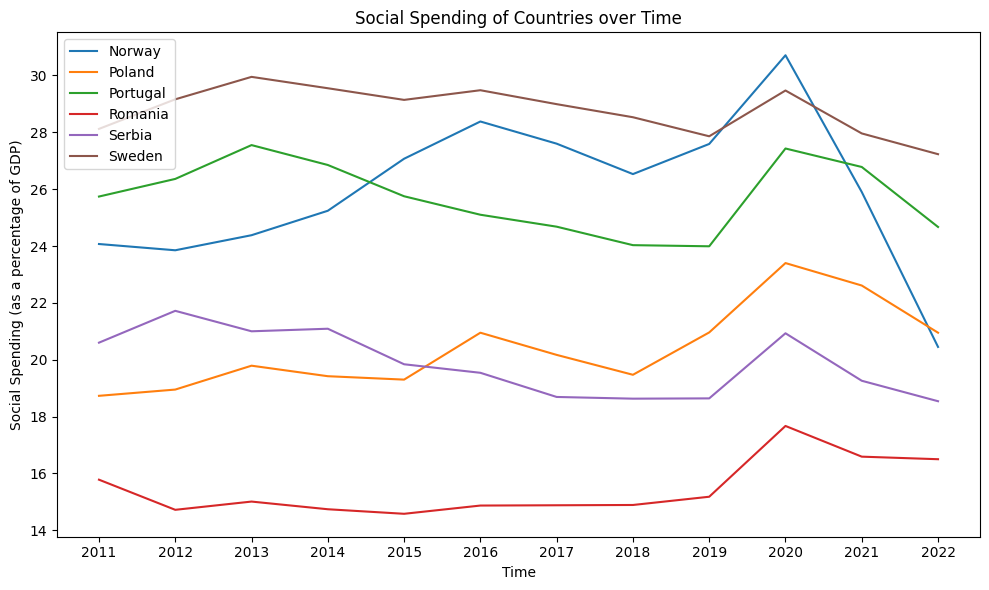

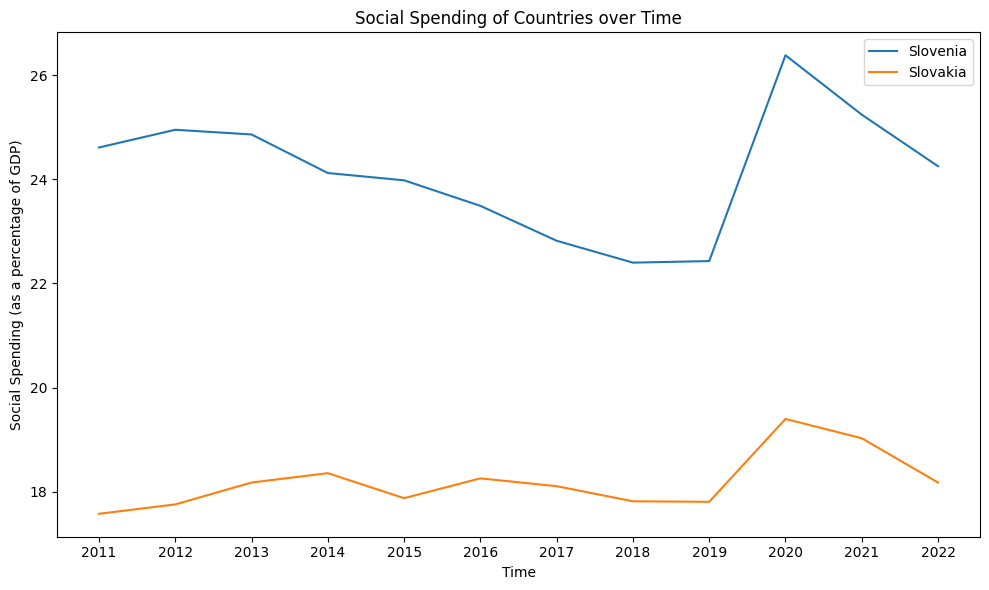

In [13]:

countries = df_clean["geo"].unique()
group_size = 6

for i in range(0, len(countries), group_size):
    plt.figure(figsize=(10, 6))
    group = countries[i:i+group_size]

    for country in group:
        subset = df_clean[df_clean["geo"] == country]
        plt.plot(subset["time"], subset["value"], label=country)

    plt.title(f"Social Spending of Countries over Time")
    plt.xlabel("Time")
    plt.ylabel("Social Spending (as a percentage of GDP)")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [14]:
sorted_asc = df_clean.sort_values(by=["value"], ascending=False)
print(sorted)


    







      time  value      geo
818   2020   38.0   France
817   2020   38.0   France
819   2020   38.0   France
815   2020   38.0   France
816   2020   38.0   France
...    ...    ...      ...
1966  2022    8.6  Türkiye
1965  2022    8.6  Türkiye
1967  2022    8.6  Türkiye
1968  2022    8.6  Türkiye
1969  2022    8.6  Türkiye

[1970 rows x 3 columns]
